# **Data Standardization**


---

**Data Standardization** in data science refers to the process of scaling data to ensure that it has a consistent format, which is crucial for improving the performance and accuracy of machine learning models. It involves transforming data so that it has a mean of 0 and a standard deviation of 1.

**Why Standardize?**
  - **Model Performance**: Algorithms like logistic regression, SVMs, and neural networks perform better with standardized data.
  - **Equal Weight**: Ensures that features with larger numerical ranges don't dominate others.
  - **Convergence Speed**: Helps gradient-based optimizers converge faster.

**Formula**:

  z = (x-μ) / σ

  - x: Original data point
  - μ: Mean of the feature
  - σ: Standard deviation

**When to Use**:
  - When features have different units (e.g., height in meters and weight in kilograms).
  - When using algorithms sensitive to feature scaling (e.g., KNN, PCA, and linear regression).


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load heart disease dataset from google drive
heart_disease_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Heart_Disease_Dataset.csv')
heart_disease_dataset.shape

(1025, 14)



1. age
2. sex
3. cp - chest pain type (4 values)
4. trestbps - resting blood pressure
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



In [4]:
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Standardize heart_disease_dataset using StandardScaler fuction
scaler = StandardScaler()
scaler.fit(heart_disease_dataset)

StandardScaler()

In [11]:
# Convert standardized data into DataFrames
standardized_data = scaler.transform(heart_disease_dataset)
standardized_data = pd.DataFrame(standardized_data, columns=heart_disease_dataset.columns)

standardized_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698


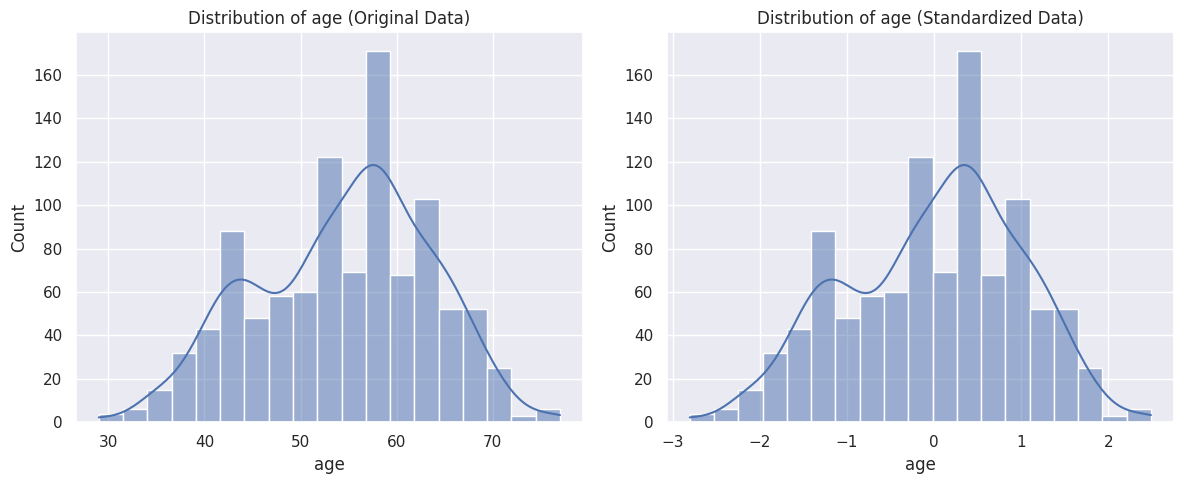

In [16]:
# Visualizing Original data and standardized data

fig, ax = plt.subplots(1, 2 ,figsize=(12, 5))

feature = 'age'

sns.set_theme()

# Original Data Plot
sns.histplot(heart_disease_dataset[feature], kde=True, ax=ax[0])
ax[0].set_title(f'Distribution of {feature} (Original Data)')
ax[0].set_xlabel(feature)
ax[0].set_ylabel('Count')

# Standardized Data Plot
sns.histplot(standardized_data[feature], kde=True, ax=ax[1])
ax[1].set_title(f'Distribution of {feature} (Standardized Data)')
ax[1].set_xlabel(feature)
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()